<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2026-1</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Joel Gómez Uribe
### Rodrigo Vega Vilchis
---

<h1 align="center">3. Métodos numéricos para la solución de</h1>
<h1 align="center">Ecuaciones Diferenciales Ordinarias (EDOs)</h1> 

---

## 3.1. Discretización e Integración numérica de EDOs: el problema del valor inicial.
<!-- 3.1.1. Discretización de ecuaciones diferenciales. -->



### En esta sección abordaremos como resolver el problema de valor inicial, (o problema de Cauchy), mediante métodos numericos. Este problema se define de la siguiente forma:

<h2 align="center">$\dot{x}(t) = f(x,t); \; \; x(0) = x_0 $ </h2>

### que es una ecuación diferencial de primer orden.  La cual resolveremos básicamente con dos métodos muy conocidos; el método de Euler y los métodos de Runge-Kutta. 

$\;$

<!-- ### 3.1.2. Meodo de Euler 1 Dimensión -->
### Método de Euler (1 Dimensión)

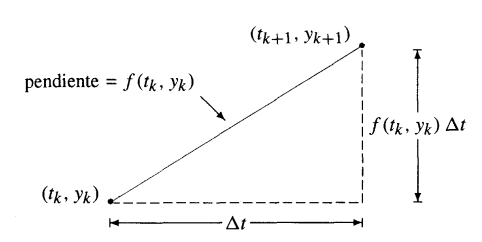

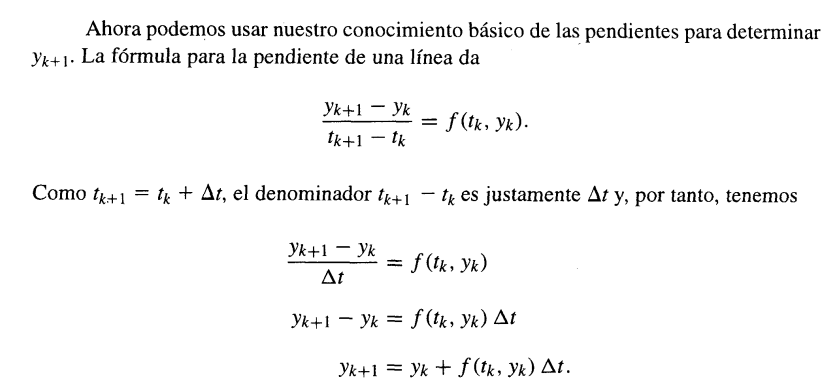

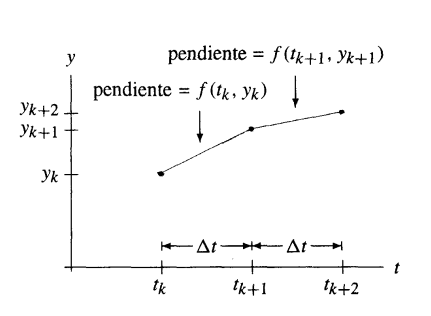

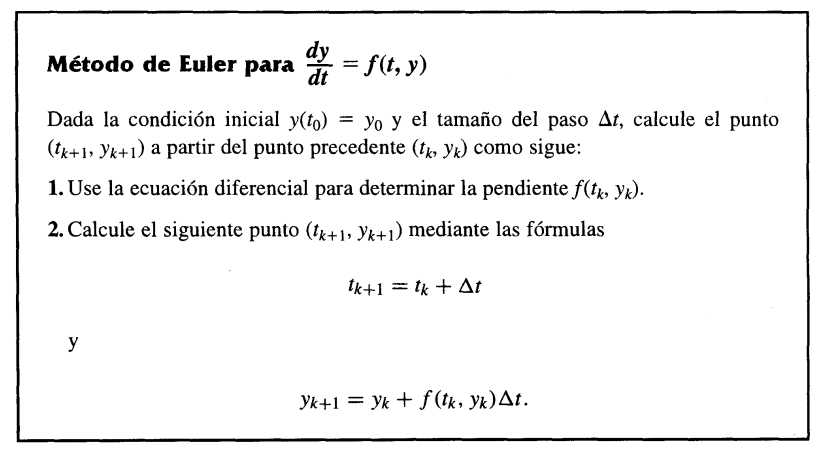

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from ipywidgets import *
%matplotlib widget

# import matplotlib as mpl
# mpl.rc('text', usetex = True)

In [3]:
def Grph(titulo,ejeX,EjeY):

    fig, ax = plt.subplots(figsize=((12,8)))

    # Titulo y etiquetas ejes
    plt.title(titulo)
    plt.xlabel(ejeX)
    plt.ylabel(EjeY)

    # Ejes y rejilla
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.grid()

In [4]:
def Euler1D(f,x0,t0,tf,dt):
    
    T=[t0]
    X=[x0]

    t=t0
    x=x0

    while (t<tf):
        x = x + f(x)*dt
        t = t + dt
        X.append(x)
        T.append(t)
  
    return X,T



## Ejemplo: Modelo de Malthus.

## $f(P) = \frac{dP}{dt} = \dot{P} = rP$

## $P(t) = P_0 e^{rt}$

In [5]:
def Malthus(P):
    r = 3
    return r*P

In [6]:
t0 = 0
p0 = 0.5

P,T = Euler1D(Malthus,p0,t0,100,.1)

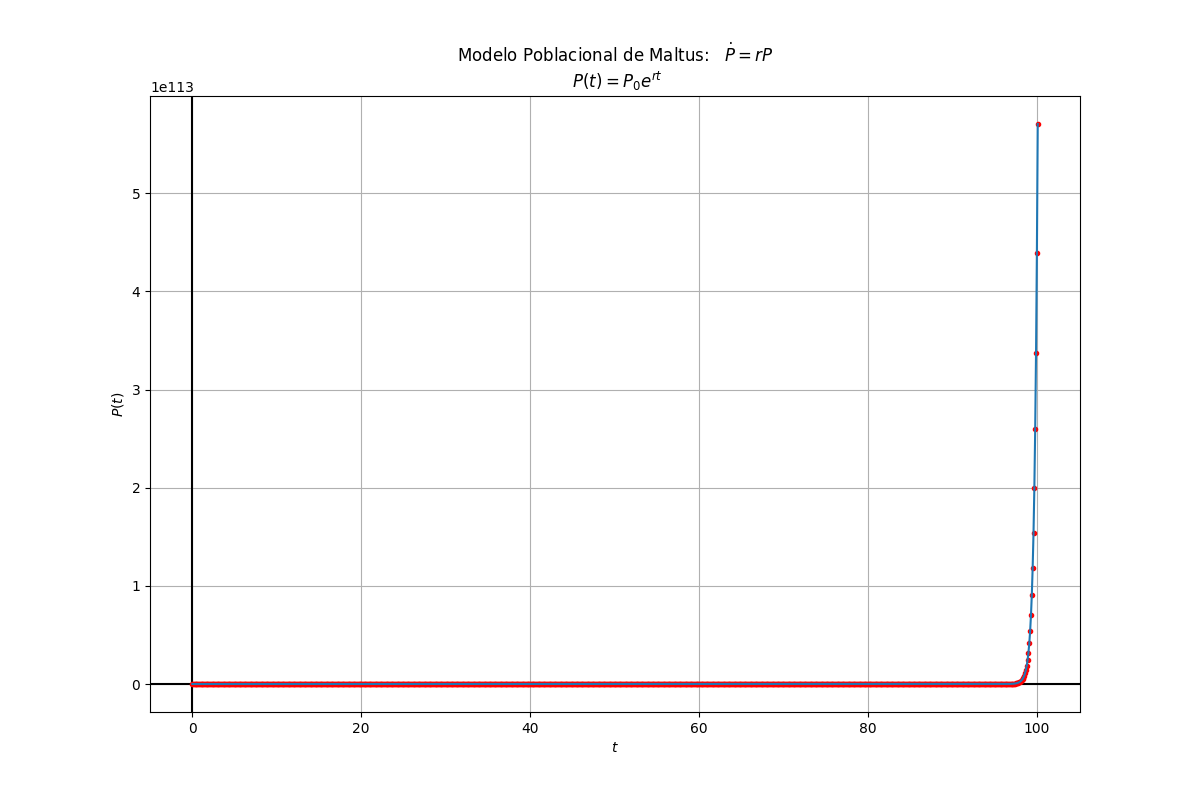

In [7]:
# fig, ax = plt.subplots(figsize=((12,8)))
Grph("Modelo Poblacional de Maltus:  $ \\; \\dot{P} = rP$ \n $P(t) = P_0 e^{rt}$","$t$","$P(t)$")

plt.plot(T,P,'r.')
plt.plot(T,P)

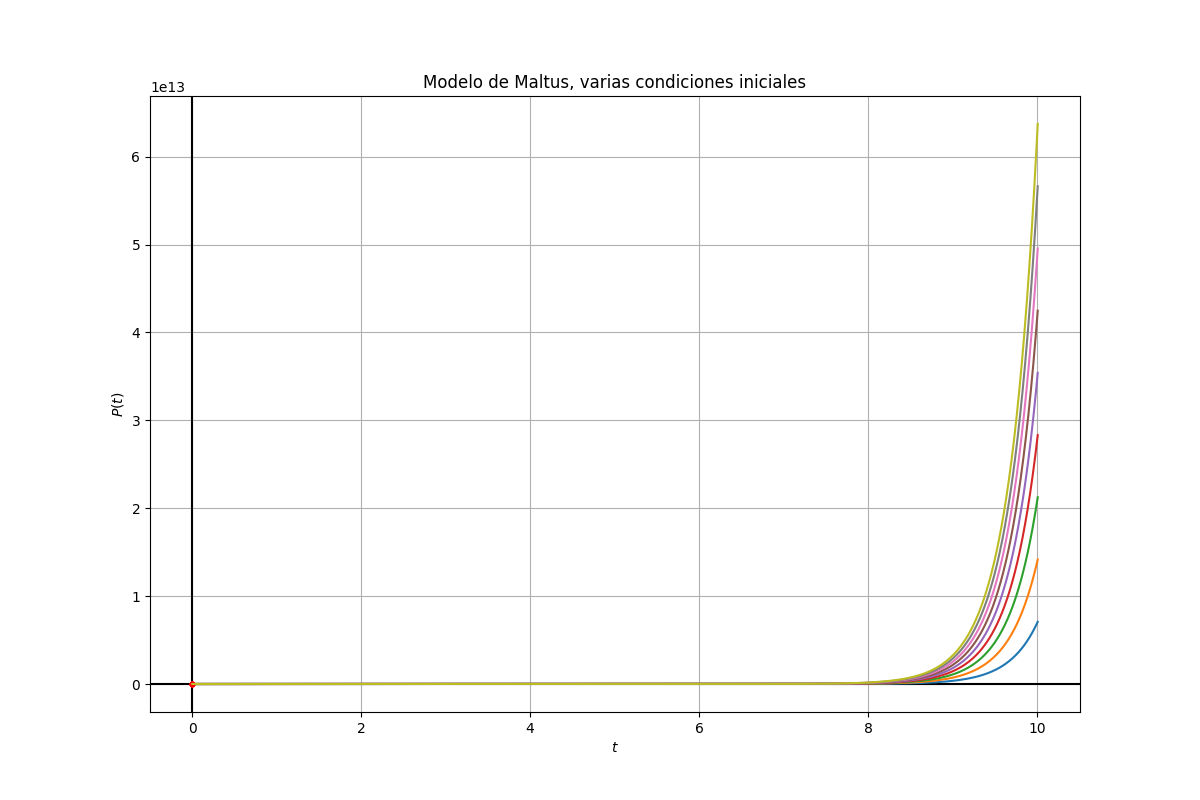

In [8]:
Grph("Modelo de Maltus, varias condiciones iniciales","$t$","$P(t)$")

t0 = 0.0
for p0 in range(1,10):
    P,T = Euler1D(Malthus,p0,t0,10,0.01)
    plt.plot(t0,p0,'r.')
    plt.plot(T,P)

## Ejemplo: Ecuación Logística (no lineal).

## $\dot{P} = rP(1 - \frac{P}{K})$

## $\frac{dP}{dt} = f(P) = rP(1 - \frac{P}{K})$

## $f(P^*) = 0$

## $P(t) =$ ??

### Poblaciones de equilibrio:

## $P^* = 0$

## $P^* = K$

In [9]:
def Logistica(P):
    r = .5
    K = 50
    return r*P*(1 - float(P)/float(K))

def Logistica2(P,r,K):
    return r*P*(1 - float(P)/float(K))

In [10]:
t0 = 0
tf = 30
p0 = 2

dt = 0.01

P,T = Euler1D(Logistica,p0,t0,tf,dt)

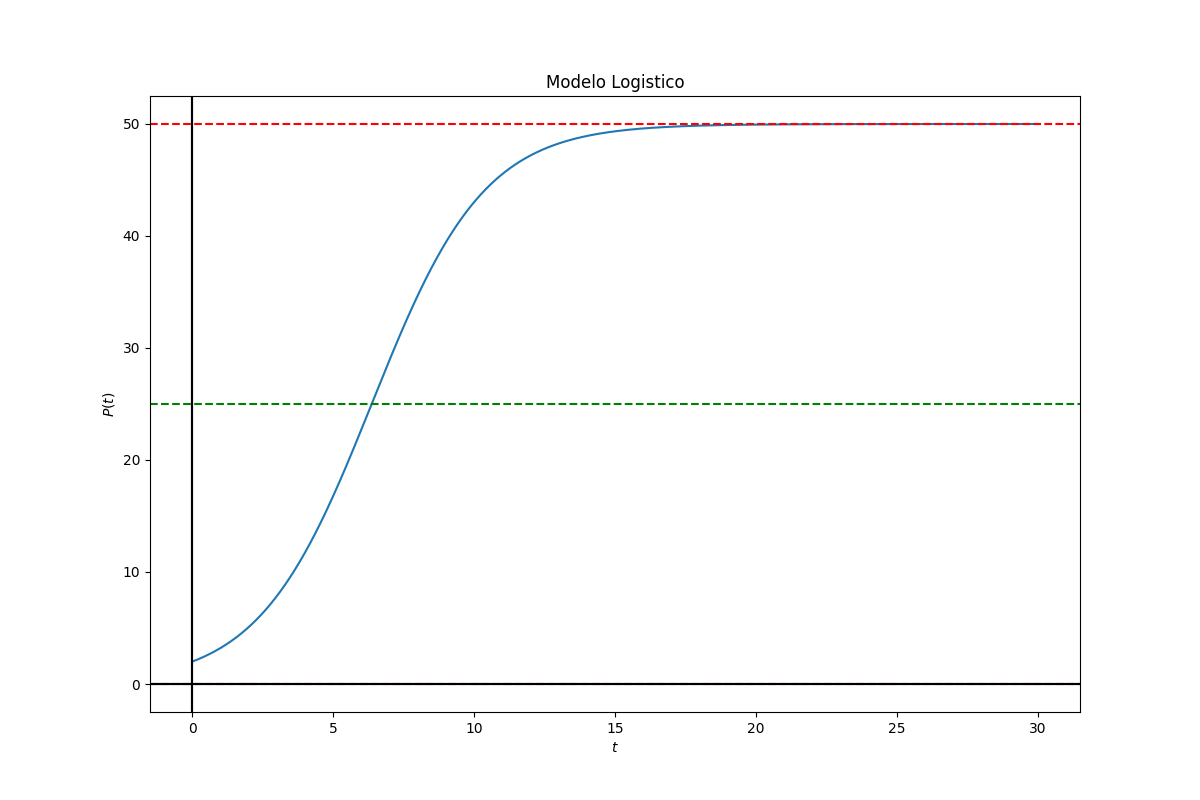

In [11]:
Grph("Modelo Logistico:  $ \\; \\dot{P} = rP(1-\\dfrac{P}{K})$","$t$","$P(t)$")


K = 50
plt.plot(T,P)
plt.axhline(K, color='red', linestyle='--')
plt.axhline(K/2, color='green', linestyle='--')
plt.axhline(0, color='red', linestyle='--')




# Titulo y etiquetas ejes
titulo = "Modelo Logistico"
plt.title(titulo)
plt.xlabel("$t$")
plt.ylabel("$P(t)$")

# Ejes y rejilla
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid()



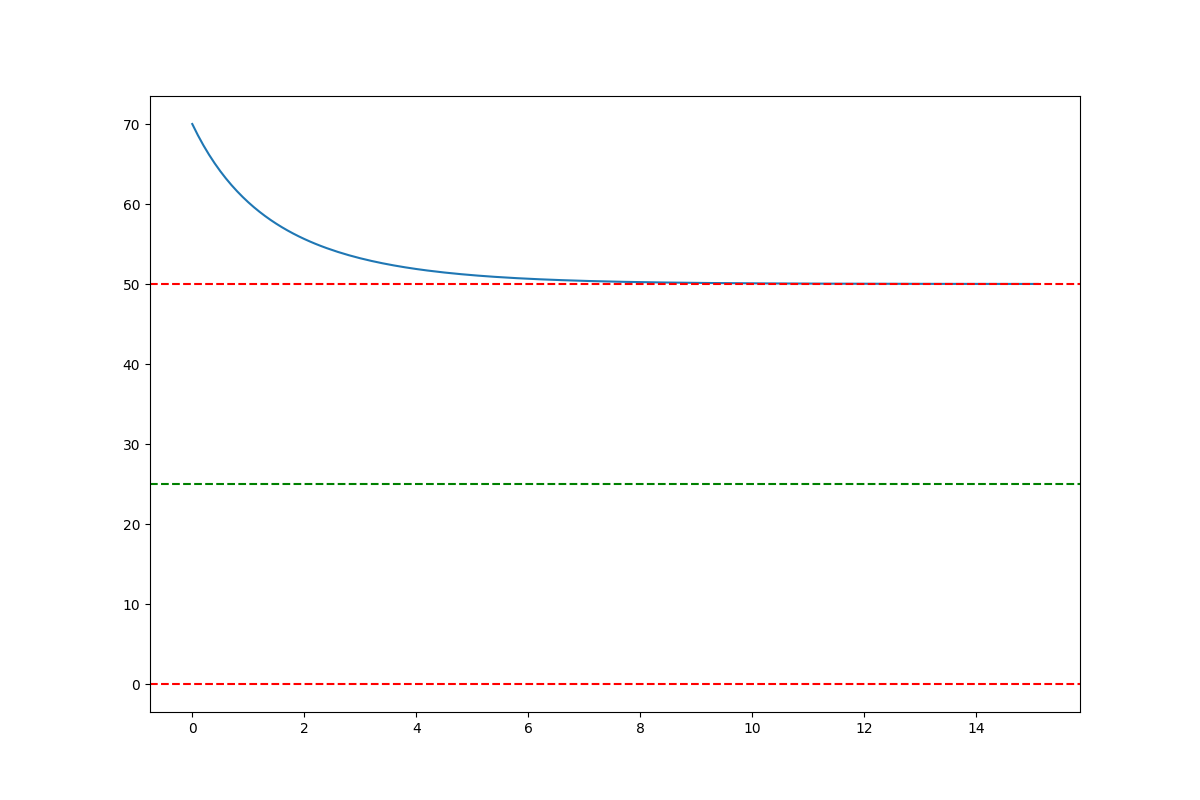

In [12]:
# Grph("Modelo Logistico:  $ \\; \\dot{P} = rP(1-\\dfrac{P}{K})$","$t$","$P(t)$")
fig, ax = plt.subplots(figsize=((12,8)))
t0 = 0
p0 = 70
P,T = Euler1D(Logistica,p0,t0,15,0.1)

K = 50
plt.plot(T,P)
plt.axhline(K, color='red', linestyle='--')
plt.axhline(K/2, color='green', linestyle='--')
plt.axhline(0, color='red', linestyle='--')

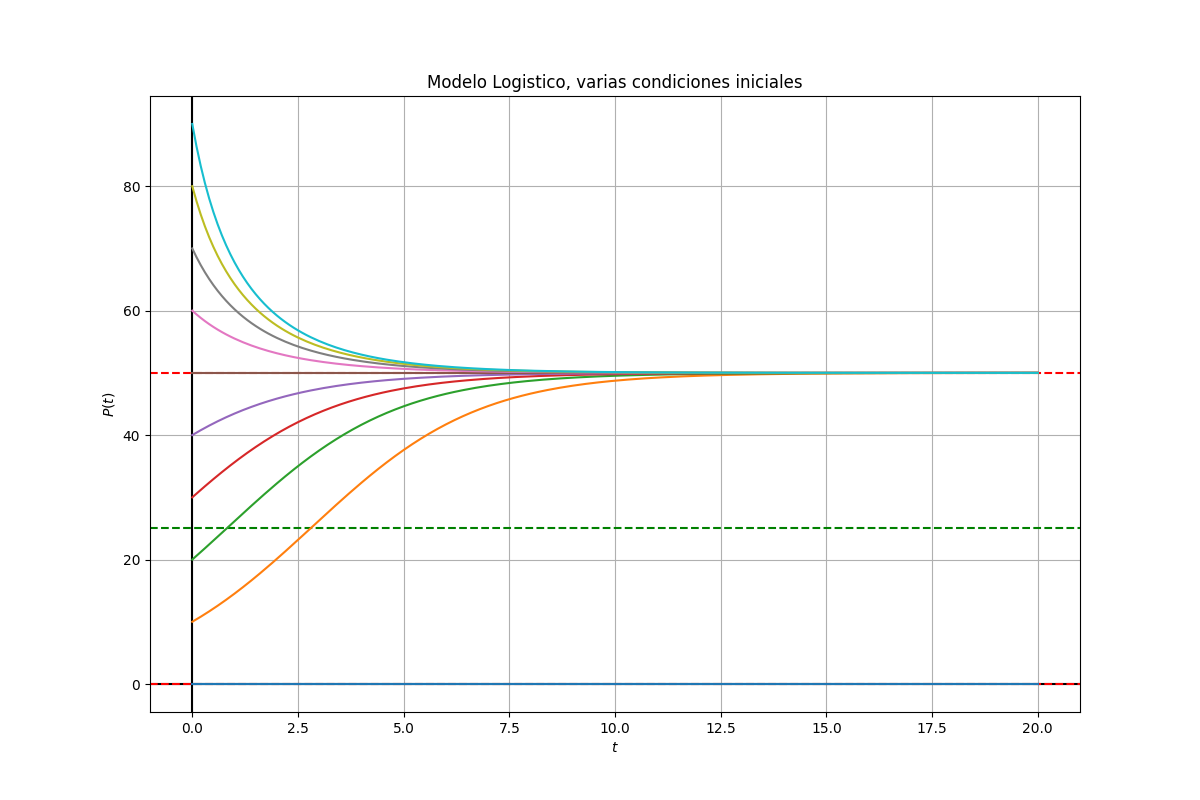

In [13]:
Grph("Modelo Logistico, varias condiciones iniciales","$t$","$P(t)$")


K = 50  # Corregir!!!!

plt.axhline(K, color='red', linestyle='--')
plt.axhline(K/2, color='green', linestyle='--')
plt.axhline(0, color='red', linestyle='--')

for p0 in range(0,100,10):
    P, T = Euler1D(Logistica,p0,t0,20,0.1)
#     P, T = Euler1D(Logistica2(p0,r,K),p0,t0,20,0.1)
    plt.plot(T,P)

<!-- # Métodos de Euler y Runge-Kutta de orden 4 como una clase -->
### Métodos de Runge-Kutta (1 Dimensión)

#### Método de Runge-Kutta de 2o orden

In [14]:
def RungeKutta1D(f,x0,t0,tf,h):
    
    T=[]
    X=[]

    T.append(t0)
    X.append(x0)

    t=t0
    x=x0

    while (t<tf):
        
        k1 = f(x)*h
        k2 = f(x+(k1/2))*h
        
        x = x + k2
        t = t + h/2
        
        X.append(x)
        T.append(t)
  
    return X,T


#### Método de Runge-Kutta de 4o orden

In [15]:
def RungeKutta4_1D(f,x0,t0,tf,h):
    
    T=[]
    X=[]

    T.append(t0)
    X.append(x0)

    t=t0
    x=x0

    while (t<tf):
        
        k1 = f(x)*h
        k2 = f(x+(k1/2))*h
        k3 = f(x+(k2/2))*h
        k4 = f(x+k3)*h
        
        x = x + (k1+(2*k2)+(2*k3)+k4)/6
        t = t + h/2
        
        X.append(x)
        T.append(t)
  
    return X,T

#### Ejemplo: Modelo de Malthus.

In [16]:
t0 = 0
p0 = 20

P1,T1 = Euler1D(Malthus,p0,t0,10,0.1)
P2,T2 = RungeKutta1D(Malthus,p0,t0,10,0.1)
P3,T3 = RungeKutta4_1D(Malthus,p0,t0,10,.01)

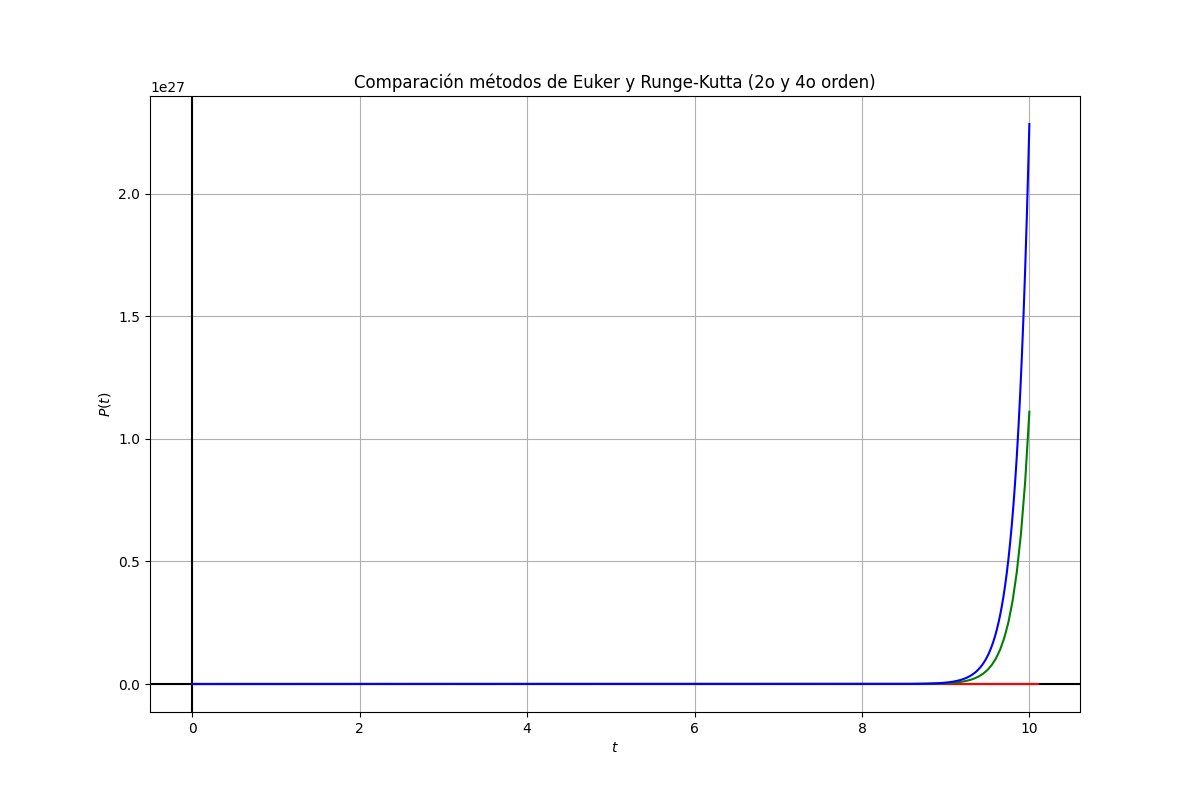

In [17]:
Grph("Comparación métodos de Euker y Runge-Kutta (2o y 4o orden)","$t$","$P(t)$")

plt.plot(T1,P1,'r')
plt.plot(T2,P2,'g')
plt.plot(T3,P3,'b')

---

## 3.2. Ecuaciones diferenciales de orden superior.
<!-- 3.1.1. Discretización de ecuaciones diferenciales. -->


## El caso del Oscilador Armónico.

### Veamos un ejemplo bien conocido de una ecuación de 2o orden: el oscilador aromónico y sus diferentes versiones.

### Ejemplo 1: Oscilador Armónico (simple).

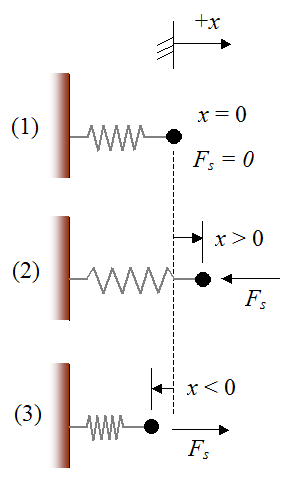

### Partiendo de la segunda ley de Newton:

<h2 align="center">$\vec{F}_s = m\vec{a}$</h2> 

### e igualando a la ley de Hooke, asumiendo que el movimiento sólo ocurre en la dirección $x$, tenemos que:

<h2 align="center">$-kx = m a_x$</h2> 


### Reacomodando términos

<!-- ## $m \dfrac{d^2x}{dt^2} + b \dfrac{dx}{dt} + kx = 0 $ -->
<h2 align="center">$m \dfrac{d^2x}{dt^2} + kx = 0 $</h2> 

<!-- # $m  \ddot{x} + b \dot{x} + kx = 0 $ -->
<h2 align="center">$m  \ddot{x} + kx = 0 $</h2> 

### Así, tenemos que:

# $\ddot{x} + \frac{k}{m} x = 0 $

# $\ddot{x} = - \frac{k}{m} x $


### Usando la técnica de reducción de orden, es decir,  haciendo el cambio de variable  $\dot{x} = v$, obtememos:

## $\dot{x} = v$ 
## $\dot{v} = - \omega_0^2 x$

### En forma matricial:

<!-- ## $
\begin{pmatrix} 
\dot{x}  \\
\dot{v} 
\end{pmatrix}
=
\begin{pmatrix} 
0 & 1 \\
- \omega_0^2  & 0
\end{pmatrix}
\begin{pmatrix} 
x  \\
v  
\end{pmatrix}
$ -->

<h2 align="center">$
\begin{pmatrix} 
\dot{x}  \\
\dot{v} 
\end{pmatrix}
=
\begin{pmatrix} 
0 & 1 \\
- \omega_0^2  & 0
\end{pmatrix}
\begin{pmatrix} 
x  \\
v  
\end{pmatrix}
$</h2> 

### De esta manera tenemos hemos planteado el sistema en la forma vectorial del _problema de Cauchy_, 

<h2 align="center">$\dot{\vec{x}}(t) = f(\vec{x},t) = \mathbb{A} \vec{x}(t) $</h2>  


### con la que podemos plantear nuestra solucuón númerica.


### En general culquier ecuación diferencial de orden  $n$ (superior a 1), 

## $\displaystyle \dfrac{d^nx}{dt^n} = f \left( \dfrac{d^{n-1}x}{dt^{n-1}} , \dfrac{d^{n-2}x}{dt^{n-2}}, \dots, \dfrac{dx}{dt} ,x,t \right)$ 

### o bien,

## $\displaystyle x^{(n)}(t) = f \left( x^{(n-1)}(t) , x^{(n-2)}(t), \dots, \ddot{x}(t), \dot{x}(t), x(t), t \right)$ 


### se puede representar como un  sistema de $n$ ecuaciones diferenciales de primer orden acopladas.

### El truco es renombrar a nuestra variable original (por ejemplo $x(t)$, como $x_1(t)$) y su derivada $n$-esima como nuevas variables.

## $x(t) = x_1$

## $\dot{x}(t) = x_2$ 

## $\ddot{x}(t) = x_3$ 

## $\vdots$ 

## $x^{(n-2)}(t) = x_{n-1}$ 

## $x^{(n-1)}(t) = x_n$ 

$\;$

## $ \; \Rightarrow \; \; \displaystyle x^{(n)}(t) = f \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$ 

### Posteriormente cada una de estas $n$ variables se define como la dervida de la anterior de forma recursiva hasta tener un conjunto de  $n$  ecuaciones de primer orden, como se muestra a continuación:

## $\dot{x}_1 = x_2$
## $\dot{x}_2 = x_3$
## $\dot{x}_3 = x_4$ 
## $\vdots$ 
## $\dot{x}_{n-2} = x_{n-1}$ 
## $\dot{x}_{n-1} = x_n$ 


$\;$

## $ \; \Rightarrow \; \; \dot{x}_n = \ddot{x}_{n-1} = \dddot{x}_{n-2} = \dots = x_3^{(n-2)} = x_2^{(n-1)} = x_1^{(n)} = x^{(n)}$

## $ \; \Rightarrow \; \; \dot{x}_n = x^{(n)}(t) = f \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$ 

$\;$


### Con lo que finalmente nos queda el siguiente sistema de $n$ ecuaciones diferenciales de primer orden acopladas:

## $\dot{x}_1 = x_2$
## $\dot{x}_2 = x_3$
## $\dot{x}_3 = x_4$ 
## $\vdots$ 
## $\dot{x}_{n-2} = x_{n-1}$ 
## $\dot{x}_{n-1} = x_n$ 
## $\dot{x}_n = f \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$ 


### Por ejemplo, considere la siguiente ecuación diferencial de 3er orden.

## $\displaystyle \dddot{x}(t) = f \left( \ddot{x}(t), \dot{x}(t), x(t), t \right)$ 

### usando la técnica descrita, tenemos que:

## $ \; \Rightarrow \; \; \displaystyle \dddot{x}_1(t) = f \left(x_3, x_2, x_1, t \right)$ 

## $\dot{x}_1 = x_2$
## $\dot{x}_2 = x_3 \; \; \; \; \; \; \; \Rightarrow \dot{x}_3 = \ddot{x}_2 = \dddot{x}_1$

## $\Rightarrow \; \; \dot{x}_3 = \dddot{x}_1(t) = f \left(x_3, x_2, x_1, t \right)$ 

### así la ecuación diferencial de 3er orden se ha transformado en un sistema de 3 ecuaciones diferenciales de primer orden acopladas:

## $\dot{x}_1 = x_2$
## $\dot{x}_2 = x_3$
## $\dot{x}_3 = f \left(x_3, x_2, x_1, t \right)$ 



$\;$

### En general, independientemente de si proviene o no de una ecuación de ornden $n$, culquier sistema de ecuaciones diferenciales de primer orden acopladas (o sistema dinámico) de $n$ ecuaciones diferenciales con $n$ incognitas tiene la siguiente forma:

<!-- 
<h2 align="center">
$\dot{x}_1 =  f_1 \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$</br>
$\dot{x}_2 =  f_2 \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$ </br>
$\dot{x}_3 =  f_3 \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$</br>
$\vdots$</br>
$\dot{x}_{n-2} =  f_{n-2} \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$</br>
$\dot{x}_{n-1} =  f_{n-1} \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$</br> 
$\dot{x}_n = f_n \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$</br> 
</h2> 
-->

## $\dot{x}_1 =  f_1 \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$ 
## $\dot{x}_2 =  f_2 \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$ 
## $\dot{x}_3 =  f_3 \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$ 
## $\vdots$ 
## $\dot{x}_{n-2} =  f_{n-2} \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$ 
## $\dot{x}_{n-1} =  f_{n-1} \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$ 
## $\dot{x}_n = f_n \left( x_n , x_{n-1}, \dots, x_3, x_2, x_1, t \right)$ 

$\;$

### Para el caso de que la ecuación sea **_homogenea_**, es decir que no tenga depenencoa de explicita de $t$, el sistema puede tomar la siguiente forma:


<!-- 
## $\dot{x}_1 = a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n$ 

## $\dot{x}_2 = a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n$ 

## $\vdots$

## $\dot{x}_n = a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n$  
-->

<h2 align="center">
$\dot{x}_1 = a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n$</br>
$\dot{x}_2 = a_{21}x_1 + a_{22}x_2 + \cdots + a_{2n}x_n$</br>
$\vdots$</br>
$\dot{x}_n = a_{m1}x_1 + a_{m2}x_2 + \cdots + a_{mn}x_n$</br>
</h2>

###  el cual puede escribirse matricialmente como:


<h2 align="center">$
\begin{pmatrix} 
\dot{x}_1  \\
\dot{x}_2  \\
\vdots \\
\dot{x}_n
\end{pmatrix}
=
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{2,2} & \cdots & a_{2n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m1} & a_{m2} & \cdots & a_{mn} 
\end{pmatrix}
\begin{pmatrix} 
x_1  \\
x_2  \\
\vdots \\
x_n  \\
\end{pmatrix}
$</h2>

### es decir de la forma:

<h2 align="center">$\dot{\vec{x}}(t) = f(\vec{x},t) = \mathbb{A} \vec{x}(t) $</h2> 

### que no es más que es la forma vectorial del _problema de Cauchy_ que abordamos para una dimensión.

<h2 align="center">$\dot{\vec{x}}(t) = f(\vec{x},t);$</h2>
<h2 align="center">$\vec{x}(0) = \left(x_1(0), \cdots, x_n(0)  \right)$</h2>

## Análisis de la Estabilidad del sistema

### Dicho sistema tiene $n$ puntos de equilibrio y sus estabilidad depende de los valores y vectores propios de la matriz $\mathbb{A}$.

### Los puntos de equilibrio se encuentran al resolver:

### $f(\vec{x},t) = \vec{0}$

### $\dot{\vec{x}^{*}}(t) = \vec{0}$

### Es decir donde las soluciones no cambian en el tiempo. O bien:

### $f(\vec{x}^*,t) = \vec{0}$

### $\mathbb{A} \vec{x}^{*} = \vec{0}$

## $
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{2,2} & \cdots & a_{2n} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_{m1} & a_{m2} & \cdots & a_{mn} 
\end{pmatrix}
\begin{pmatrix} 
x_1^*  \\
x_2^*  \\
\vdots \\
x_n^*  \\
\end{pmatrix}
=
\begin{pmatrix} 
0  \\
0  \\
\vdots \\
0
\end{pmatrix}
$

#### Nota: Sólo funciona para ecuaciones autonomas, es decir, $f(\vec{x},t) = f(\vec{x})$ o bien para ecuaciones tipo $\dot{\vec{x}}(t) = f(\vec{x},t) = \mathbb{A} \vec{x}(t)$, donde $\mathbb{A}$ tiene coeficientes constatntes $A_{ij} \neq a_{ij}(t)$

### A pesar de que sólucionaremos el sistema numericamente, tener en cuenta esté análisis es útil para poder verificar la certeza de nuestra solución.

### Para sistemas de 2 dimensiones:

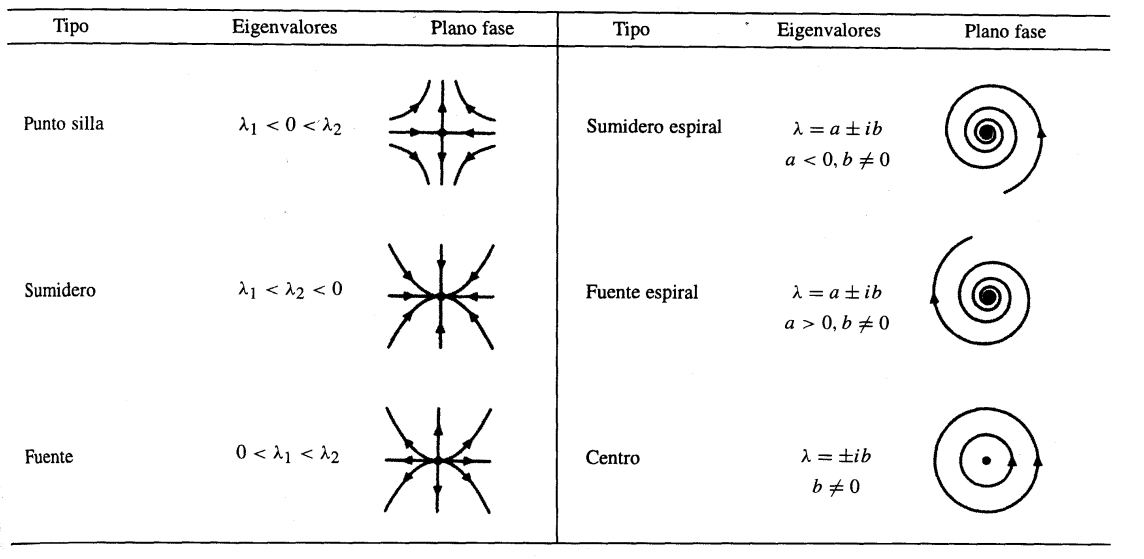

### Metodo de Euler 2 Dimensiones

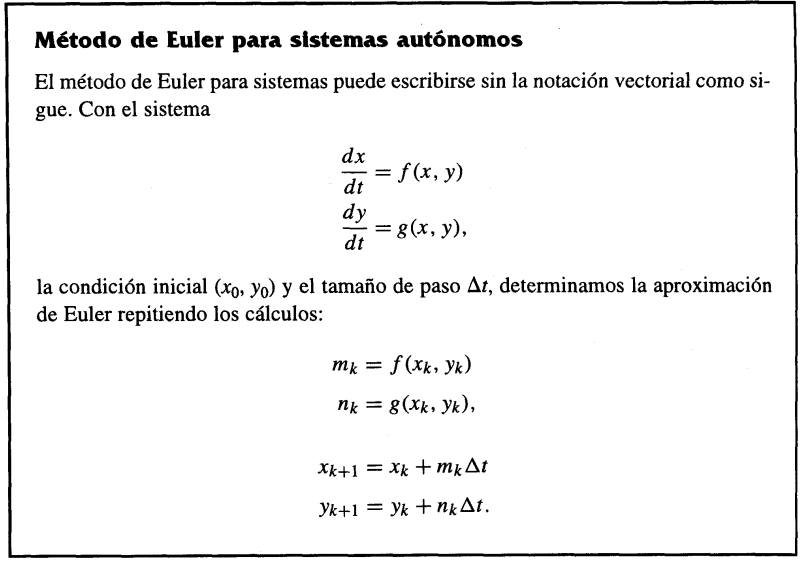

### Partiendo de nuestro código del método de Euler para 1 dimensión, podemos generalizarlo para 2 dimensiones (incluso para $n$ dimensiones).

In [18]:
def Euler2D(f,x0,t0,tf,dt):  ## x0 es un vector de 2D (x0,y0)
    
    T=[]
    X1=[]
    X2=[]
    
    X1.append(x0[0])
    X2.append(x0[1])
    T.append(t0)

    t=t0
    x=x0   ## x es un vector de 2D

    while (t<tf):

        x = x + f(x)*dt  ## x es un vector de 2D
        t = t + dt
        
        X1.append(x[0])
        X2.append(x[1])
        T.append(t)

    return X1,X2,T

In [19]:
def RungeKutta4_2D(f,x0,t0,tf,h):
    
    T=[]
    X1=[]
    X2=[]
    
    X1.append(x0[0])
    X2.append(x0[1])
    T.append(t0)

    t=t0
    x=x0

    while (t<tf):
        
        k1 = f(x)*h
        k2 = f(x+(k1/2))*h
        k3 = f(x+(k2/2))*h
        k4 = f(x+k3)*h
        
        x = x + (k1+(2*k2)+(2*k3)+k4)/6
        t = t + h/2
        
        X1.append(x[0])
        X2.append(x[1])
        T.append(t)

    return X1,X2,T

### Definimos una función para el _Oscilador Armónico simple_.

In [20]:
def OsciladorSimple(x0,w0=1):
    
       
    y = np.zeros(len(x0))

    y[0] = x0[1]
    y[1] = -w0*x0[0]

    return y

### Y resolvemos el sistema con nuestro método de Euler (generalizado) para 2 dimensiones.

In [21]:
x0 = np.array([0.1,0.1]) #condicion inicial
X,V,T = Euler2D(OsciladorSimple,x0,0,50,0.001) # Los parametros son t0=0, tf=50 y dt=0.001)
# X,V,T = RungeKutta4_2D(OsciladorSimple,x0,0,150,0.001) # Los parametros son t0=0, tf=50 y dt=0.001)

### Graficamos la soluciones, tanto para la posición $x(t)$, como para la velocidad $\dot{x}(t) = v(t)$

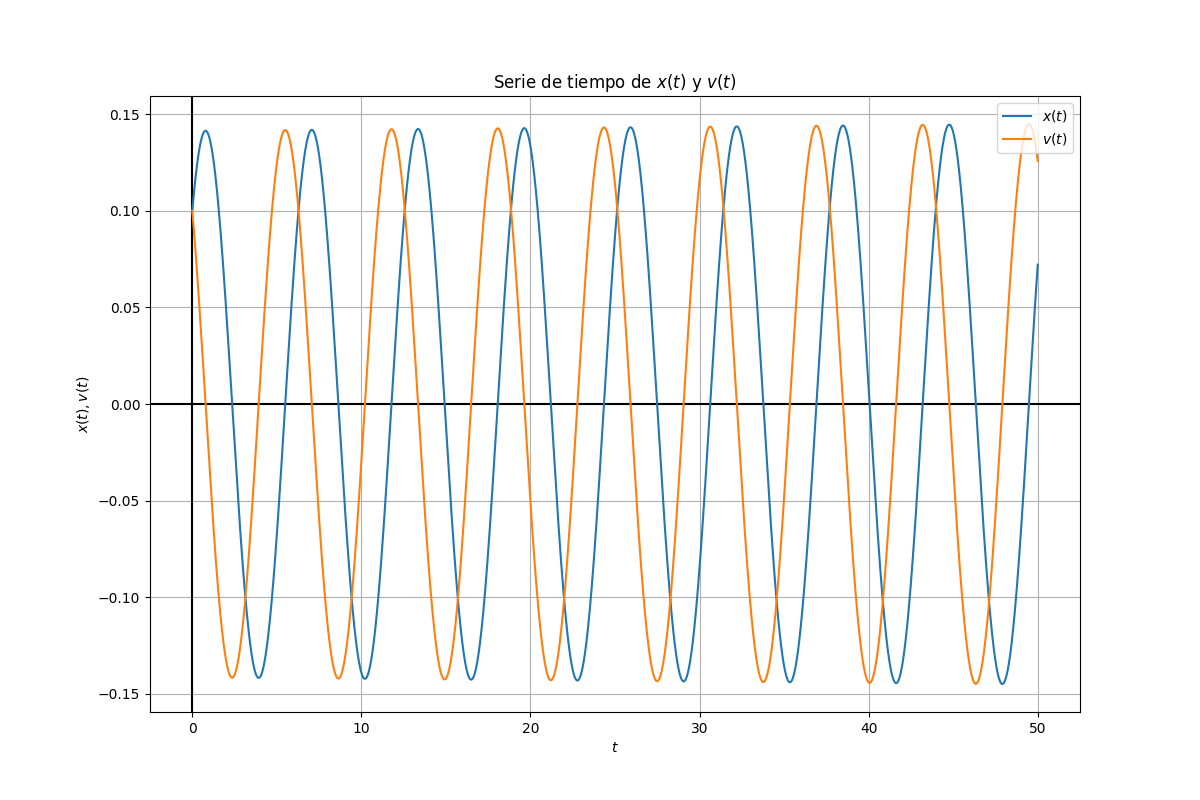

In [22]:
Grph("Serie de tiempo de $x(t)$ y $v(t)$","$t$","$x(t),v(t)$")
plt.plot(T,X, label='$x(t)$')
plt.plot(T,V, label='$v(t)$')
plt.legend(loc='upper right')

### Al graficar $x(t)$ vs $v(t)$, podemos constatar que nuestro cálculo numerico conincide con el espacio fase predicho por la teoría; al exhibir al origen como un punto de equilibrio con la estabilidad correspondiente a un _"centro"_. Es fácil comprobar que los valores porpios de la matriz asociada a este sistema son complejos totalmente imaginarios.


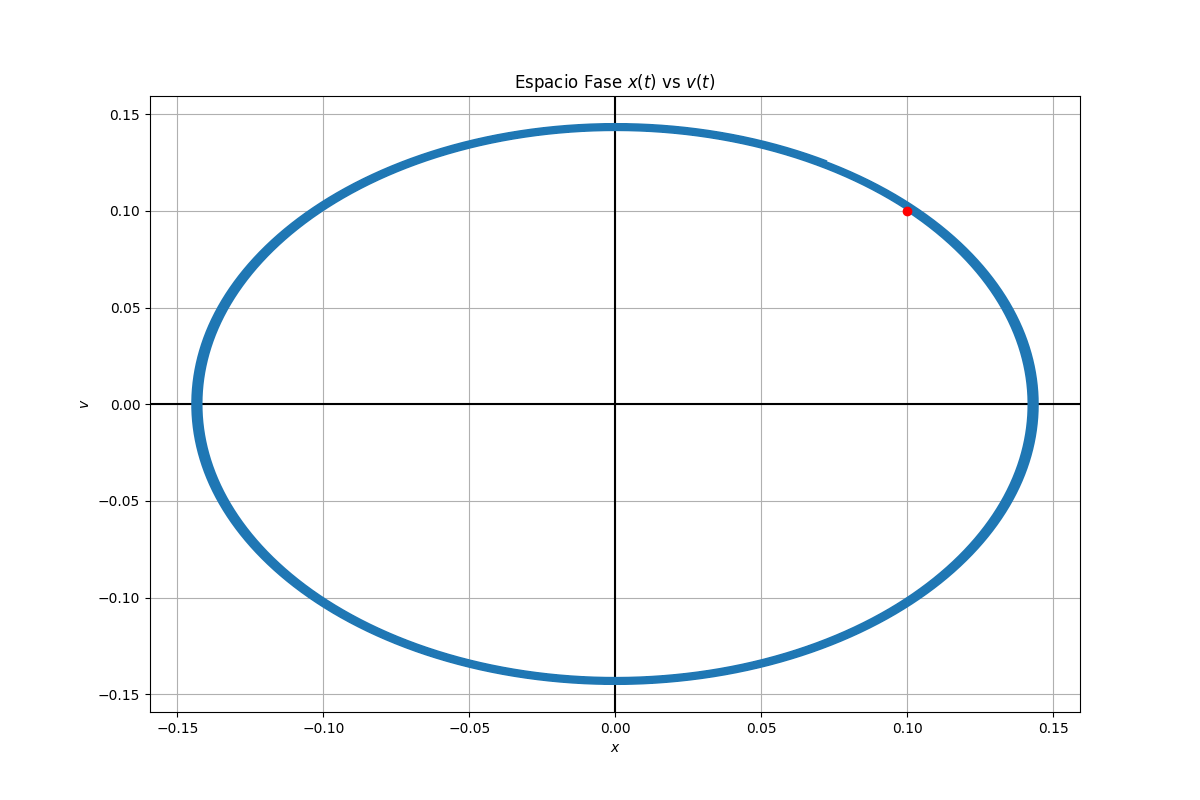

In [23]:
# %matplotlib notebook
Grph("Espacio Fase $x(t)$ vs $v(t)$","$x$","$v$")

plt.plot(X,V)
plt.plot(x0[0],x0[1],'ro')  # Condición inicial

### Podemos graficar el espacio fase para diferentes condiciones iniciales

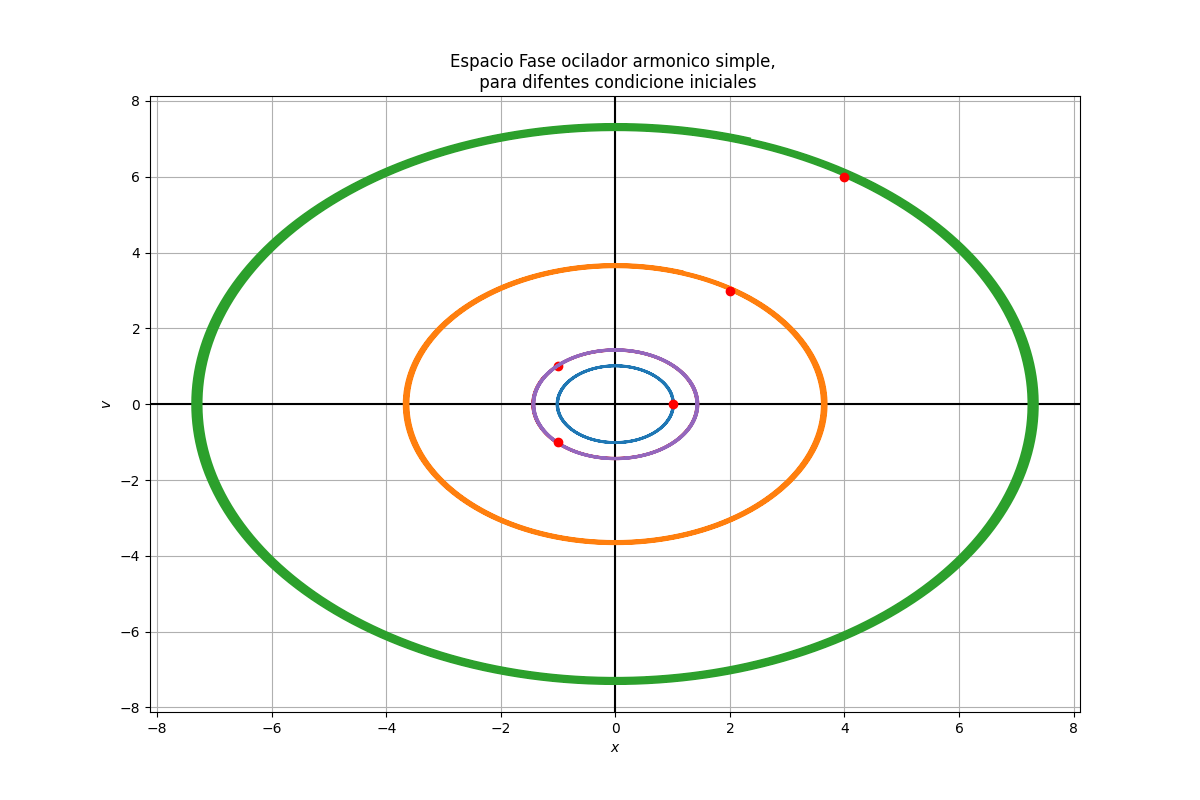

In [24]:
Grph("Espacio Fase ocilador armonico simple, \n para difentes condicione iniciales","$x$","$v$")

for i, j in [[1,0], [2,3], [4,6], [-1,1], [-1,-1]]:  #Estas son las diferentes condicione iniciales
    x0 = np.array([i,j])
    X1,X2,T = Euler2D(OsciladorSimple,x0,0,50,0.001)  # Los parametros son t0=0, tf=50 y dt=0.001)
    # X1,X2,T = RungeKutta4_2D(OsciladorSimple,x0,0,50,0.001)  # Los parametros son t0=0, tf=50 y dt=0.001)    

    plt.plot(X1,X2)
    plt.plot(x0[0],x0[1],'ro')

#### Sin embargo, si hacemos un zoom a la grafica, podemos ver que algo no anda muy bien.

### Ahora resolvamos (y grafiquemos) el sistema, pero usando el método de _Runge-Kutta de 4o orden_ generalizado a 2 dimensiones. 
### Comencemos con generalizar nuestra función que implementa el método, a dos dimensiones. 

In [25]:
def RungeKutta4_2D(f,x0,t0,tf,h):
        
    
    T=[]
    X1=[]
    X2=[]

    X1.append(x0[0])
    X2.append(x0[1])
    T.append(t0)


    t=t0
    x=x0   ## x es un vector de 2D
    
    while (t<tf):
        
        k1 = f(x)*h
        k2 = f(x+(k1/2))*h
        k3 = f(x+(k2/2))*h
        k4 = f(x+k3)*h
        
        x = x + (k1+(2*k2)+(2*k3)+k4)/6     ## OJO!! recuerda que x es un vector de 2D
        t = t + h/2
        
        X1.append(x[0])
        X2.append(x[1])
        T.append(t)

    return X1,X2,T

### Y apliquemoslo

In [26]:
x0 = np.array([0.1,0.1]) #condicion inicial
X,V,T = RungeKutta4_2D(OsciladorSimple,x0,0,50,0.001) # Los parametros son t0=0, tf=50 y dt=0.001)

### Graficamos la soluciones, tanto para la posición $x(t)$, como para la velocidad $\dot{x}(t) = v(t)$

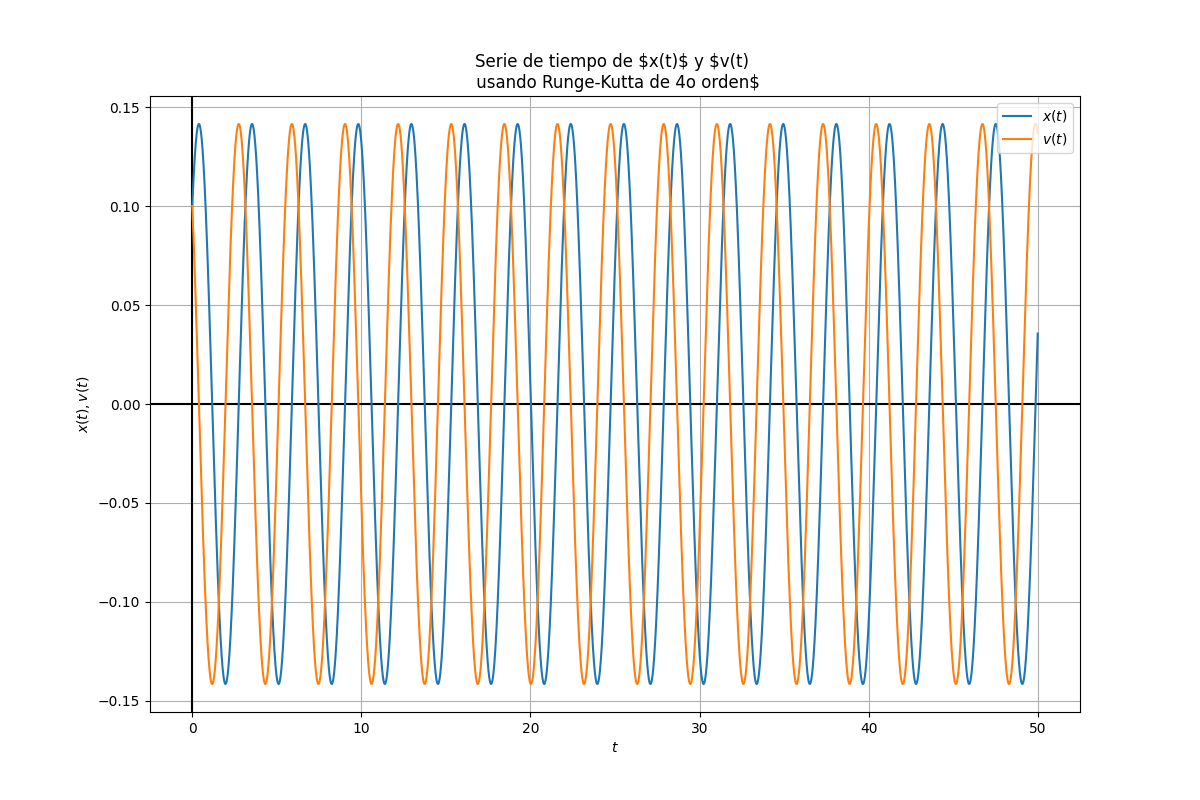

In [27]:
Grph("Serie de tiempo de $x(t)$ y $v(t) \n usando Runge-Kutta de 4o orden$","$t$","$x(t),v(t)$")
plt.plot(T,X, label='$x(t)$')
plt.plot(T,V, label='$v(t)$')
plt.legend(loc='upper right')

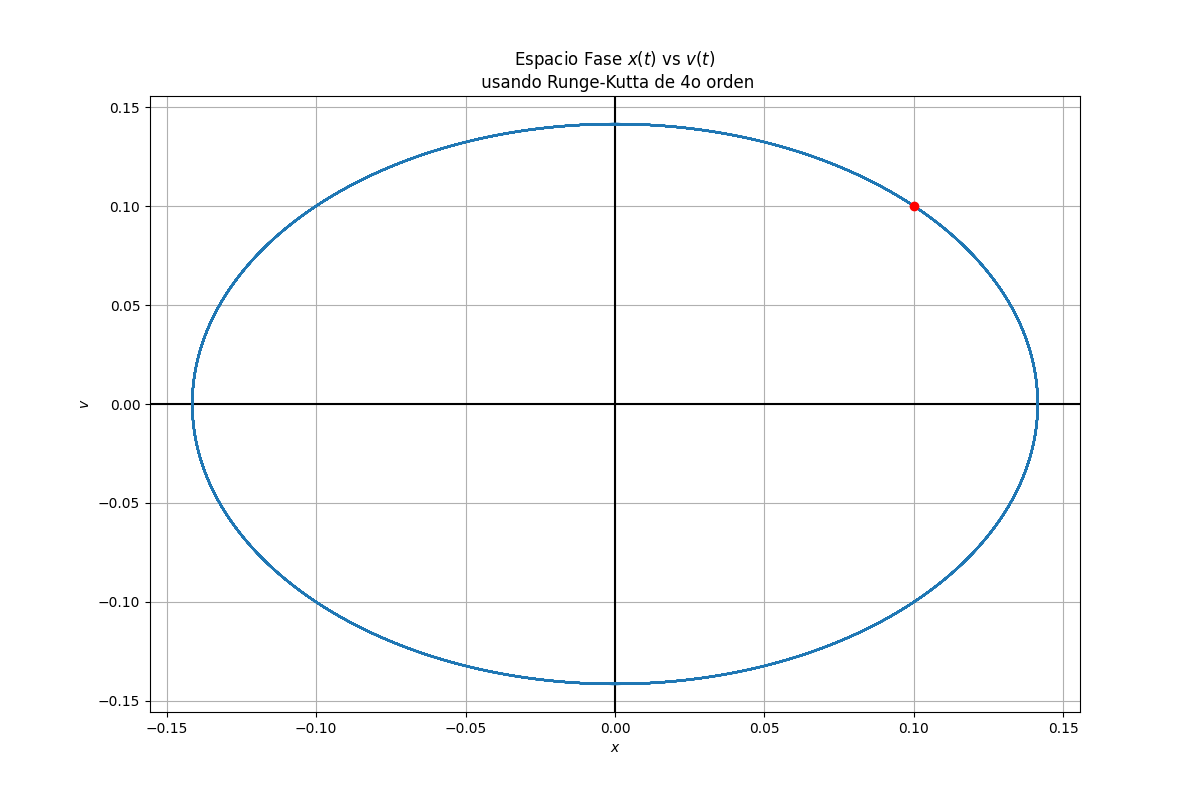

In [28]:
# %matplotlib notebook
Grph("Espacio Fase $x(t)$ vs $v(t)$ \n usando Runge-Kutta de 4o orden","$x$","$v$")

plt.plot(X,V)
plt.plot(x0[0],x0[1],'ro')  # Condición inicilal

### Para diferentes condiciones iniciales

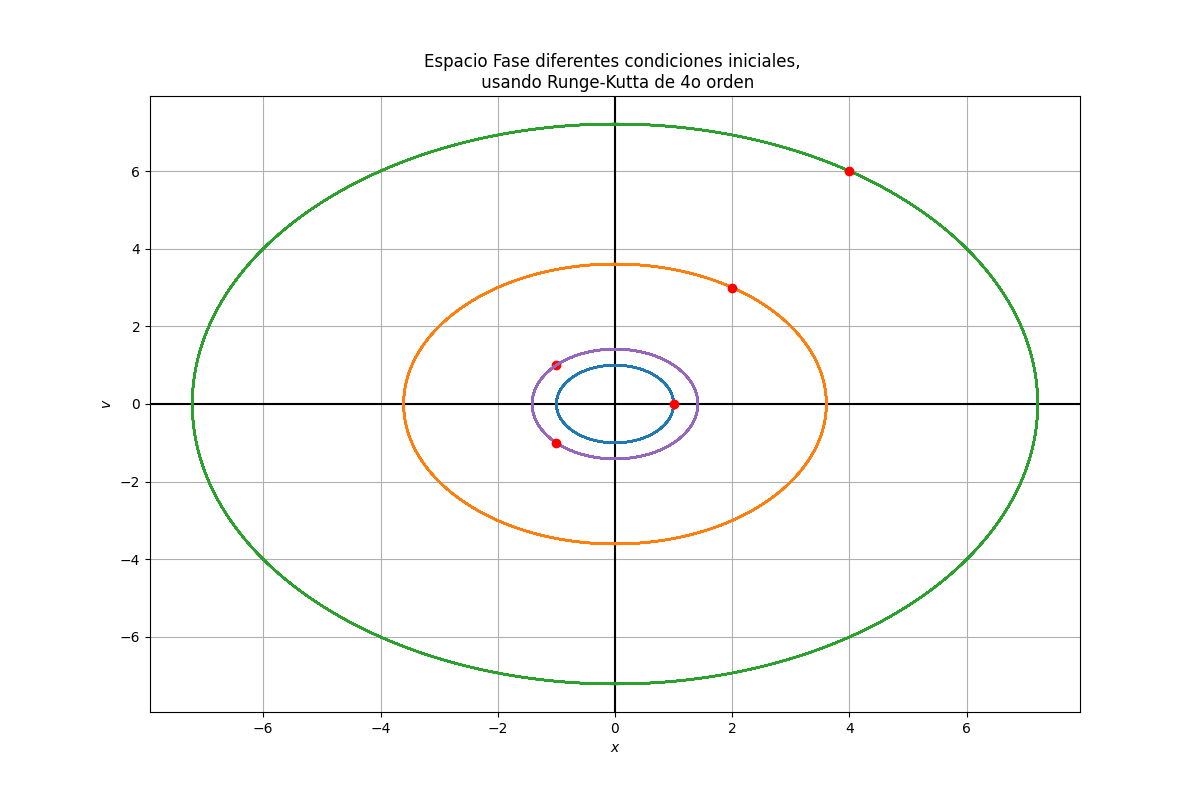

In [29]:
# %matplotlib notebook
Grph("Espacio Fase diferentes condiciones iniciales, \n usando Runge-Kutta de 4o orden","$x$","$v$")

for i, j in [[1,0], [2,3], [4,6], [-1,1], [-1,-1]]:  #Estas son las diferentes condicione iniciales
    x0 = np.array([i,j])
    X1,X2,T = RungeKutta4_2D(OsciladorSimple,x0,0,50,0.001)  # Los parametros son t0=0, tf=50 y dt=0.001)

    plt.plot(X1,X2)
    plt.plot(x0[0],x0[1],'ro') 

### Al hacer zoom a la grafica, podemos ver que el comportamiento extraño que notamos anteriormete se ha corregido. Por lo que podemos concluir que se debía a la falta de presición en la "resolucón" que podia brindar el método de Euler y que se ha corregido con étodo de Runge-Kutta de 4o orden.

### Finalmente comparemos ambos métodos


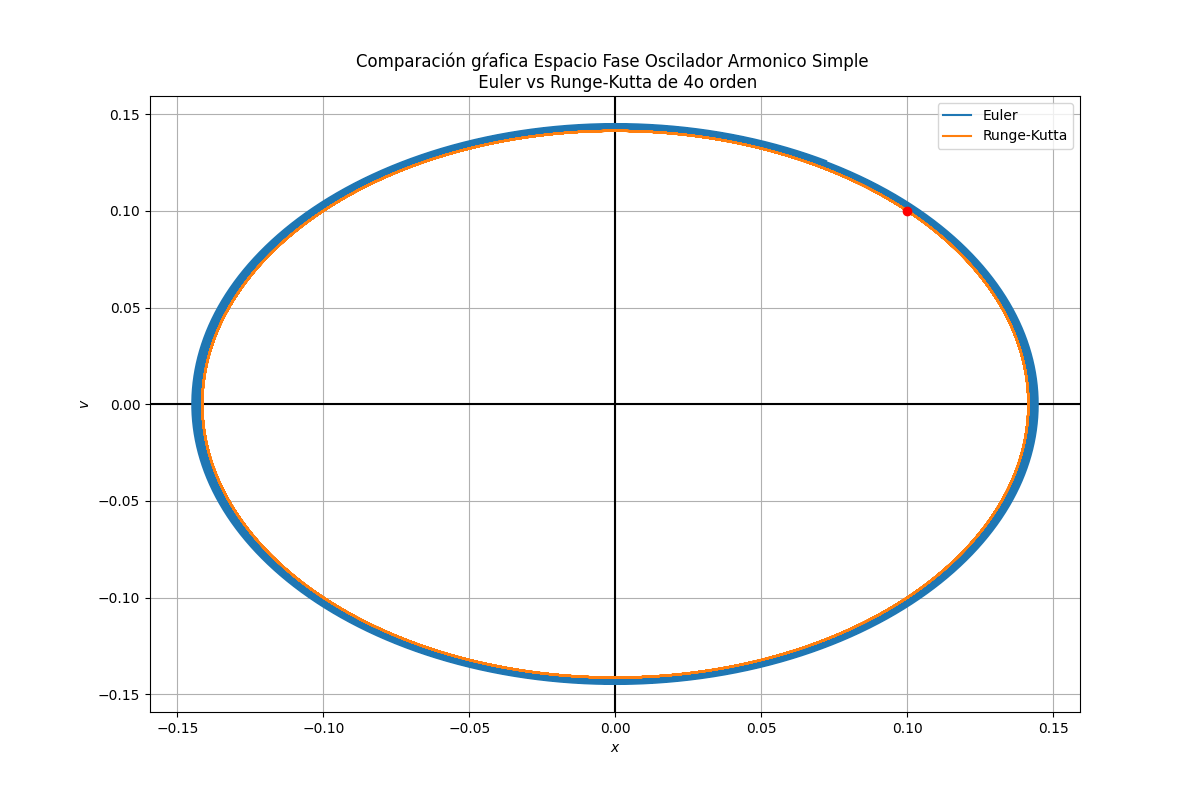

In [30]:
x0 = np.array([0.1,0.1]) #condicion inicial

X1,V1,T = Euler2D(OsciladorSimple,x0,0,50,0.001)
X2,V2,T = RungeKutta4_2D(OsciladorSimple,x0,0,50,0.001) 

# %matplotlib notebook
Grph("Comparación gŕafica Espacio Fase Oscilador Armonico Simple \n Euler vs Runge-Kutta de 4o orden","$x$","$v$")

plt.plot(X1,V1, label='Euler')
plt.plot(X2,V2, label='Runge-Kutta')
plt.plot(x0[0],x0[1],'ro')  # Condición inicilal
plt.legend(loc='upper right')

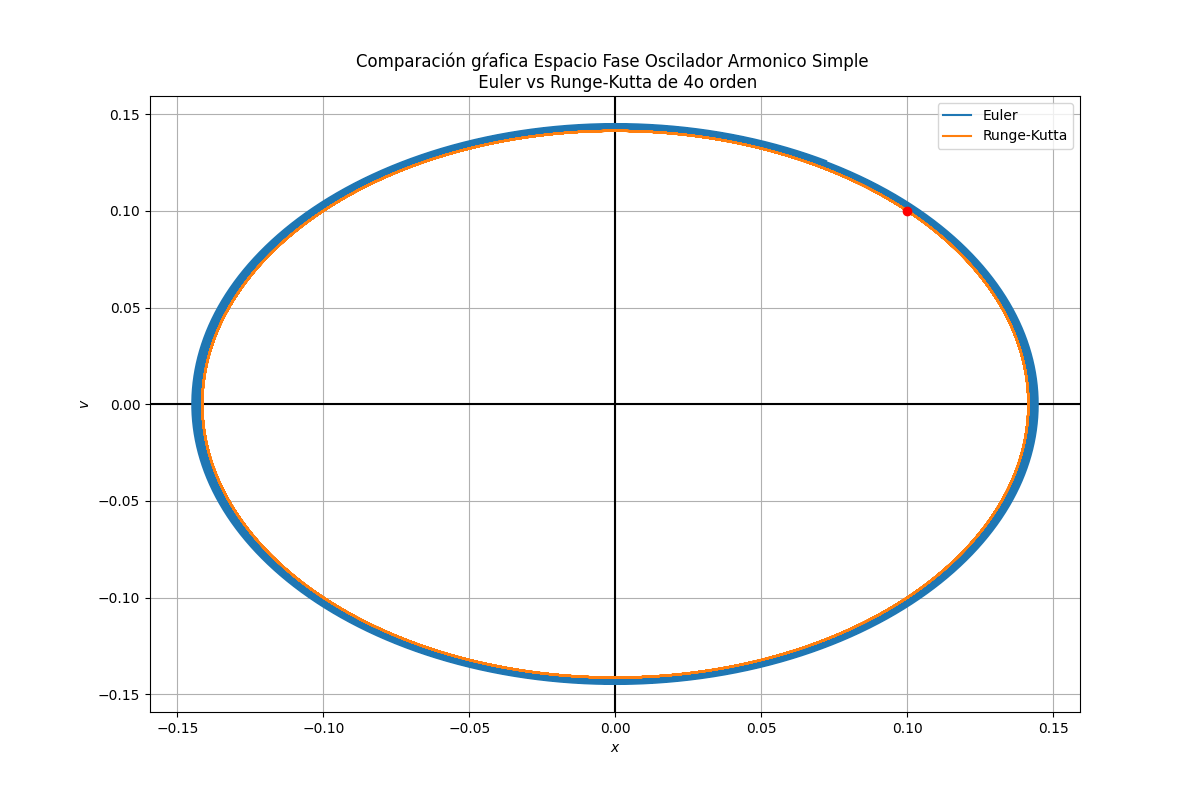

In [31]:
Grph("Comparación gŕafica Espacio Fase Oscilador Armonico Simple \n Euler vs Runge-Kutta de 4o orden","$x$","$v$")

plt.plot(X1,V1, label='Euler')
plt.plot(X2,V2, label='Runge-Kutta')
plt.plot(x0[0],x0[1],'ro')  # Condición inicilal
plt.legend(loc='upper right')

### Es claro que para un sistema de la forma:

<h2 align="center">$\dot{\vec{x}}(t) = \mathbb{A} \vec{x}(t) $</h2>  

<!-- ## $
\begin{pmatrix} 
\dot{x}  \\
\dot{v} 
\end{pmatrix}
=
\begin{pmatrix} 
0 & 1 \\
- \omega_0^2  & 0
\end{pmatrix}
\begin{pmatrix} 
x  \\
v  
\end{pmatrix}
$ -->

<h2 align="center">$
\begin{pmatrix} 
\dot{x}  \\
\dot{v} 
\end{pmatrix}
=
\begin{pmatrix} 
0 & 1 \\
- \omega_0^2  & 0
\end{pmatrix}
\begin{pmatrix} 
x  \\
v  
\end{pmatrix}
$</h2> 


### la solución es un vector $\vec{x}$ de la forma:

<h2 align="center">$
\vec{x} =
\begin{pmatrix} 
x(t)  \\
v(t)  
\end{pmatrix}
$</h2> 

### Dicho vector, tiene una intrepretación geométrica, que corresponde con el tamaño de esta manera tenemos hemos planteado el sistema en la forma vectorial del _problema de Cauchy_, 

<h2 align="center">$\dot{\vec{x}}(t) = f(\vec{x},t) = \mathbb{A} \vec{x}(t) $</h2>  

### con la que podemos plantear nuestra solucuón númerica.


### Ejemplo 2: Oscilador Armónico (amortiguado).


### So agregamos el término de fricción $-b v_x$ a nuestra ecuación del oscialdor armonico simple, tenemos que:

## $-kx -b v_x= ma_x$

## $- kx - b \dfrac{dx}{dt} = m \dfrac{d^2x}{dt^2} $

### $\Longrightarrow$

# $m  \ddot{x} + b \dot{x} + kx = 0 $

# $\ddot{x} + \frac{b}{m} \dot{x} + \frac{k}{m} x = 0 $

# $\ddot{x} = - \frac{b}{m} \dot{x} - \frac{k}{m} x $


###  Realizando el mismo cambio de variable que usamos anteriormente ($\dot{x} = v$), se obtiene:

## $\dot{x} = v$ 

## $\dot{v} = - \frac{b}{m} v - \frac{k}{m} x $

$\;$

### Sean  $\omega_0^2 \equiv \frac{k}{m}$  y  $\beta \equiv \frac{b}{m}$. Entonces el sistema queda como:

## $\dot{x} = v$ 
## $\dot{v} = - \omega_0^2 x - \beta v $

### Y en forma matricial ($\dot{\vec{x}} = \mathbb{A} \vec{x} $):

<h2 align="center">$
\begin{pmatrix} 
\dot{x}  \\
\dot{v} 
\end{pmatrix}
=
\begin{pmatrix} 
0 & 1 \\
- \omega_0^2  & - \beta
\end{pmatrix}
\begin{pmatrix} 
x  \\
v  
\end{pmatrix}
$</h2> 


### Definimos una función para el _Oscilador Armónico amortiguado_.

In [32]:
def OsciladorAmortiguado(x):  # x es un vector en 2D  (x,v)
    w0 = 1
    beta = .3
    y = np.array(np.zeros(2))
    
    y[0] = x[1]
    y[1] = -w0*x[0] - beta*x[1]

    return y

### Y resolvemos el sistema con nuestro método de Euler (generalizado) para 2 dimensiones.

In [33]:
x0 = np.array([1,0])  #condicion inicial
X,V,T = Euler2D(OsciladorAmortiguado,x0,0,100,0.001) # Los parametros son t0=0, tf=100 y dt=0.001)

### Graficamos la soluciones, tanto para la posición $x(t)$, como para la velocidad $\dot{x}(t) = v(t)$

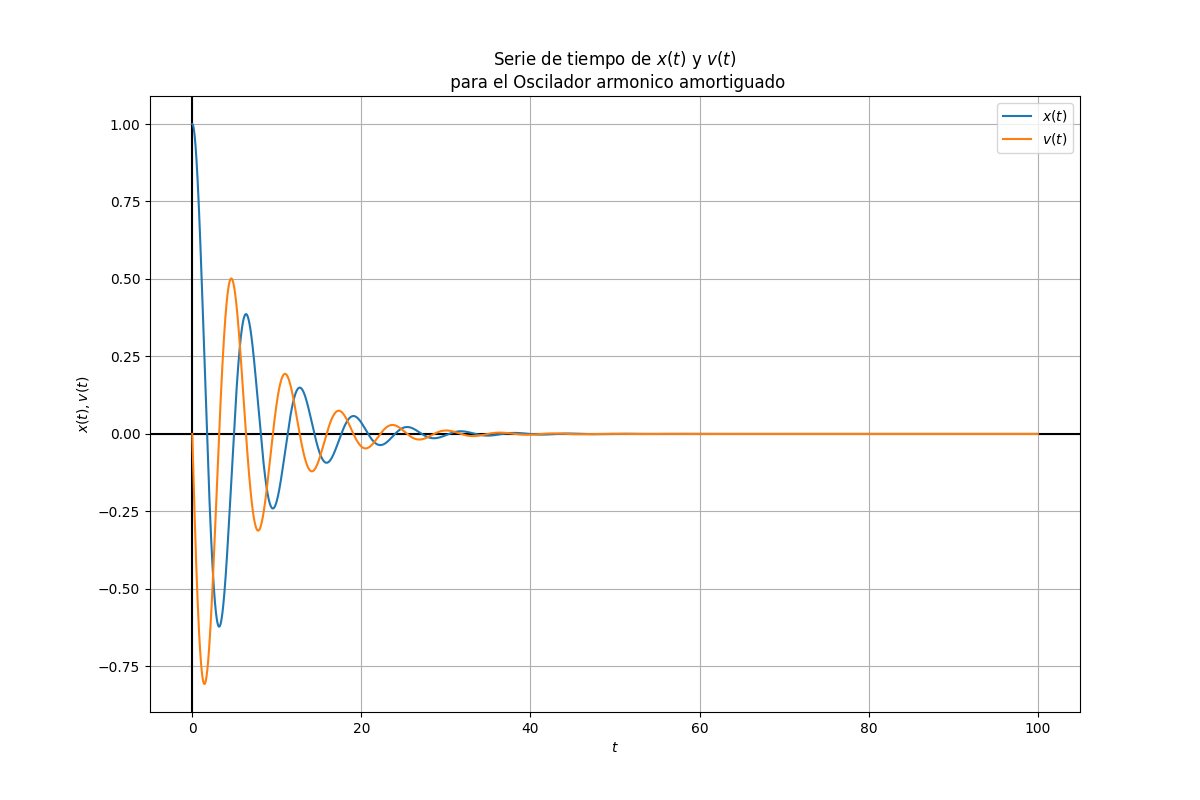

In [34]:
Grph("Serie de tiempo de $x(t)$ y $v(t)$ \n para el Oscilador armonico amortiguado","$t$","$x(t),v(t)$")
plt.plot(T,X, label='$x(t)$')
plt.plot(T,V, label='$v(t)$')
plt.legend(loc='upper right')

### Nuevamente podemos constatar que nuestro cálculo numerico conincide con el espacio fase predicho por la teoría; pues ahora la estabilidad del origen corresponde con un _"sumidero espiral"_ pues los valores porpios de la matriz asociada a este sistema son complejos, pero ahora tienen una parte real negativa.


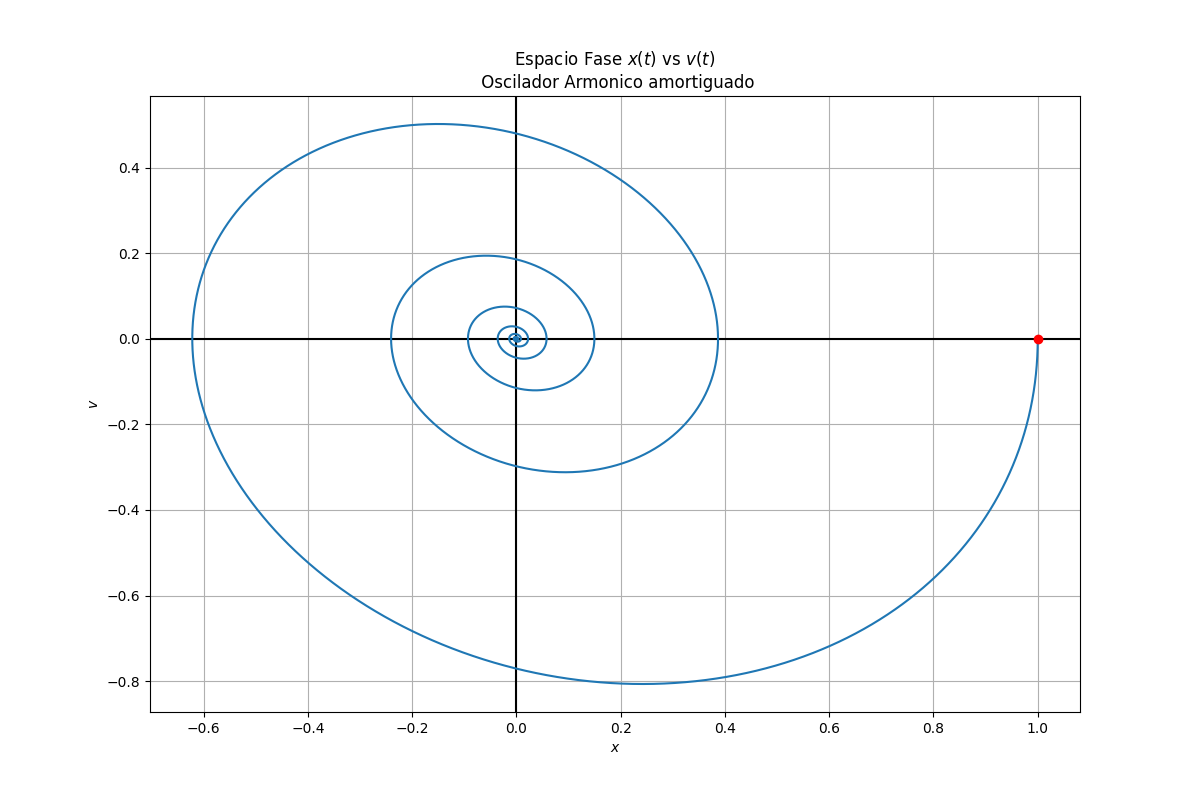

In [35]:
Grph("Espacio Fase $x(t)$ vs $v(t)$ \n Oscilador Armonico amortiguado","$x$","$v$")

plt.plot(X,V)
plt.plot(x0[0],x0[1],'ro')  # Condición inicilal

### Podemos graficar el espacio fase para diferentes condiciones iniciales

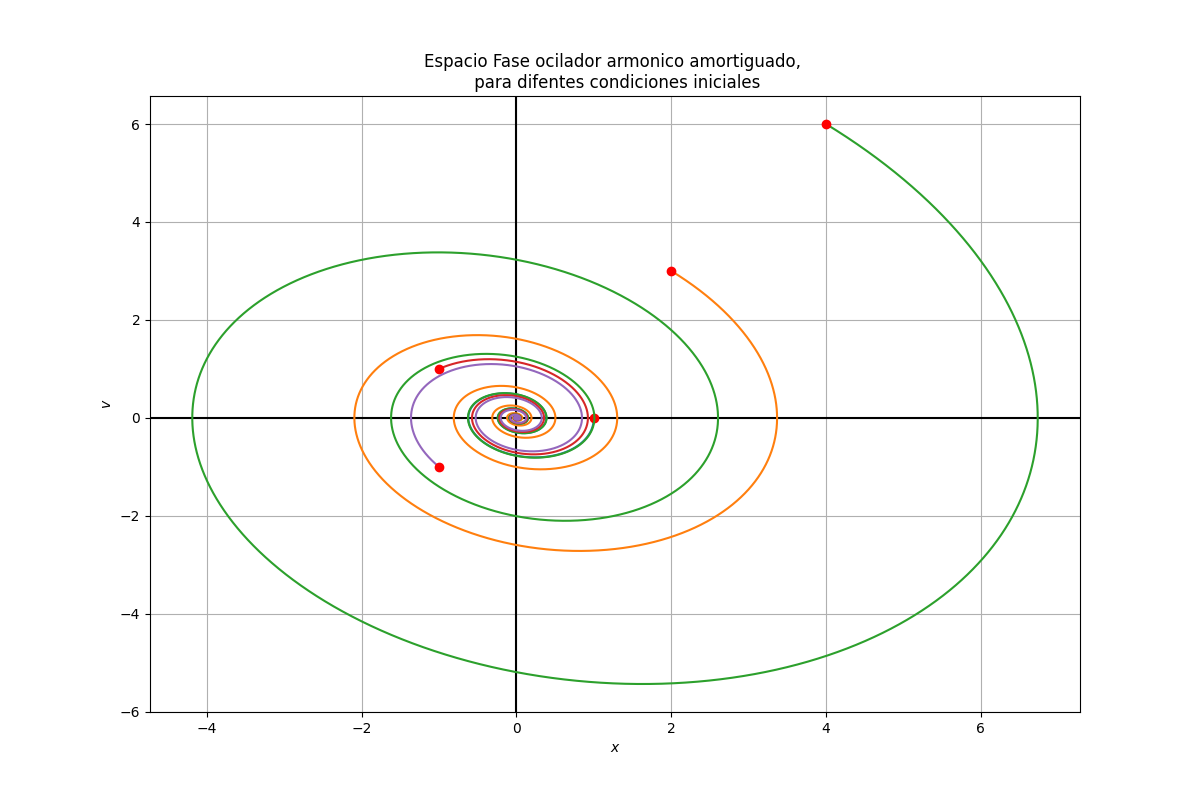

In [36]:
Grph("Espacio Fase ocilador armonico amortiguado, \n para difentes condiciones iniciales","$x$","$v$")

for i, j in [[1,0], [2,3], [4,6], [-1,1], [-1,-1]]:  #Estas son las diferentes condicione iniciales
    x0 = np.array([i,j])
    X1,X2,T = Euler2D(OsciladorAmortiguado,x0,0,50,0.001)  # Los parametros son t0=0, tf=50 y dt=0.001)

    plt.plot(X1,X2)
    plt.plot(x0[0],x0[1],'ro')
    

### En este caso no se muestra el comportamiento extraño que notamos con el Oscilador Armonico, mostrando que para este sistema el método de Euler tiene una mejor precisión. Sin embargo, comparemoslo con el de Runge-Kutta (4o orden).

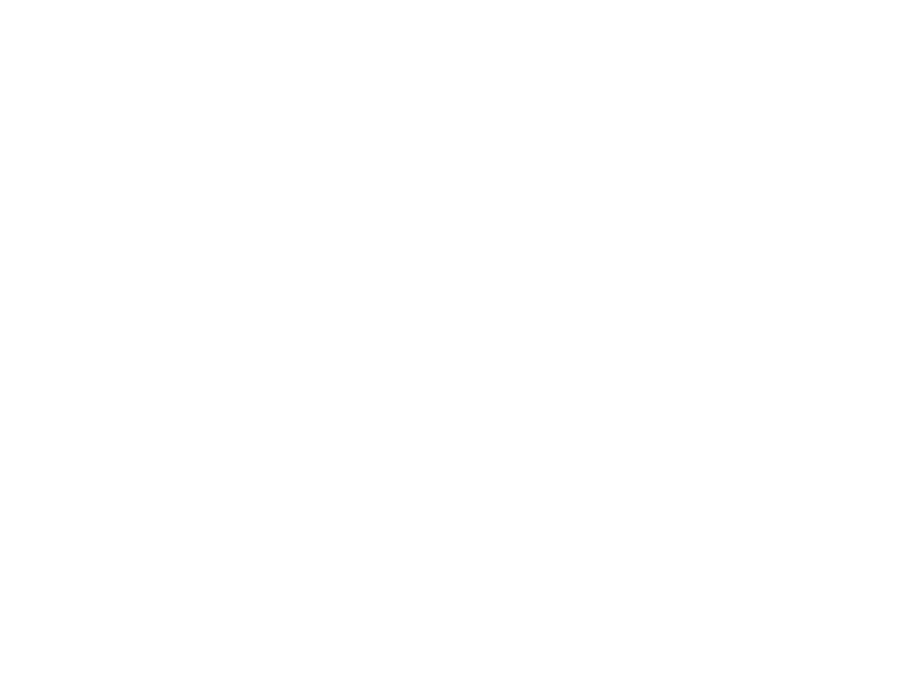

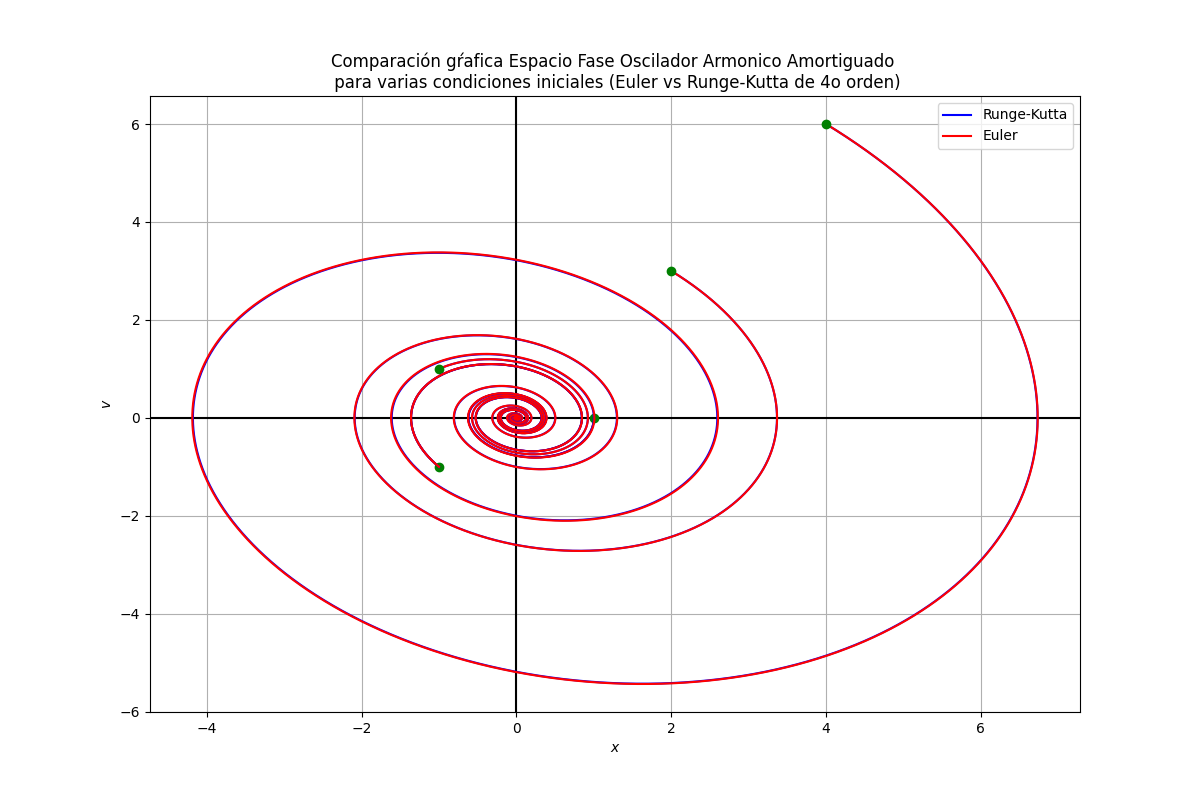

In [37]:
# %matplotlib notebook
plt.figure(figsize=(9,7))
Grph("Comparación gŕafica Espacio Fase Oscilador Armonico Amortiguado \n para varias condiciones iniciales (Euler vs Runge-Kutta de 4o orden)","$x$","$v$")

for i, j in [[1,0], [2,3], [4,6], [-1,1], [-1,-1]]:  #Estas son las diferentes condicione iniciales
    
    x0 = np.array([i,j])
    
    X1,V1,T = Euler2D(OsciladorAmortiguado,x0,0,50,0.001)
    X2,V2,T = RungeKutta4_2D(OsciladorAmortiguado,x0,0,50,0.001) 

    plt.plot(X2,V2, 'b-')
    plt.plot(X1,V1, 'r-')
    plt.plot(x0[0],x0[1],'go')  # Condición inicilal

plt.plot(X2,V2, 'b-', label='Runge-Kutta')
plt.plot(X1,V1, 'r-',label='Euler')
plt.legend(loc='upper right')

### Como puede, notarse al hacer Zoom. La diferencia entre ambos métodos se alcanza a notar hasta valores muy cerca del origen y para un numero interaciones alto; donde el método de Runge-Kutta (4o orden), ofrece una mayor presición.

# Competencia entre especies 

<h2 align="center">$  
\;
\dot{N_1} = r_1N_1 \left[1 - \dfrac{N_1 + \alpha N_2}{K_1} \right] \\
$</h2> 



<h2 align="center">$  
\dot{N_2} = r_2N_2 \left[1 - \dfrac{N_2 + \beta N_1}{K_2} \right]
$</h2>    